## VV4 A

In [2]:
from math import sqrt
def mathequation(a,n):
    if a<0:
        return a**n
    else:
        return sqrt(a**n +a)
    
print(mathequation(2,7))
print(mathequation(-2,3))

11.40175425099138
-8


## VV4 B

In [18]:
def mathlist(n):
    for y,x in enumerate(n):
        if x**5 + x == 246:
            return y
    return -1

print(mathlist([5,4,3,2,1]))


2


## VV5 1

In [1]:
import numpy as np, numpy.random as npr
from scipy.cluster.vq import kmeans, vq, whiten

npr.seed(23)


file = "http://cs.hi.is/python/hiti-urkoma.txt"
(Year, Heat, Rainfall) = np.loadtxt(file).T

X = np.c_[Heat, Rainfall]
X = whiten(X)
(cb, d) = kmeans(X,4)
(mx,my) = cb.T
(code,dvec) = vq(X, cb)
print(f"Miðpunktar hópanna er {mx} og {my}")


def groups():
    for k in range(0,4):
        cnt = 0
        for i in code:
            if i==k:
                cnt += 1
        print(f"Fjöldi ára í hóp {k} er {cnt}")
groups()




Miðpunktar hópanna er [6.83769634 4.15941886 5.37452998 6.01324224] og [4.27809624 4.24963666 3.61690936 5.80171902]
Fjöldi ára í hóp 0 er 13
Fjöldi ára í hóp 1 er 15
Fjöldi ára í hóp 2 er 24
Fjöldi ára í hóp 3 er 18


In [2]:
import matplotlib.pyplot as plt

def qcmap(n):
   # Fjölgun scatter-lita upp í allt að 20
   # Bætið viðfangi 'cmap=qcmap(n)' við plt.scatter kall
   import matplotlib.colors as clrs
   use_cmap = 'Set1' if n <= 9 else 'tab20'
   cmap = plt.get_cmap(use_cmap)(range(n))
   if n > 5: cmap[5] = [0.95, 0.75, 0, 1]  # dekkja gula litinn
   return clrs.LinearSegmentedColormap.from_list("",cmap,n)

## VV5 2

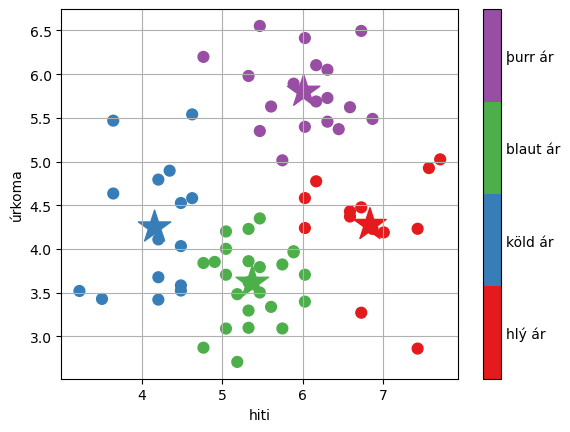

In [3]:
import matplotlib.pyplot as plt

(x,y) = X.T
(mx,my) = cb.T

lbl = ['hlý ár', 'köld ár', 'blaut ár', 'þurr ár']

plt.xlabel('hiti'), plt.ylabel('úrkoma')
plt.scatter(x, y, s=60, c=code, cmap=qcmap(4))
plt.scatter(mx, my, s=600, c=[0,1,2,3], marker='*', cmap=qcmap(4))

cba =plt.colorbar(ticks=range(4))
plt.clim(-0.5,4-0.5)
cba.set_ticklabels(lbl)
cba.ax.tick_params(size=0)
plt.grid()

## VV5 3

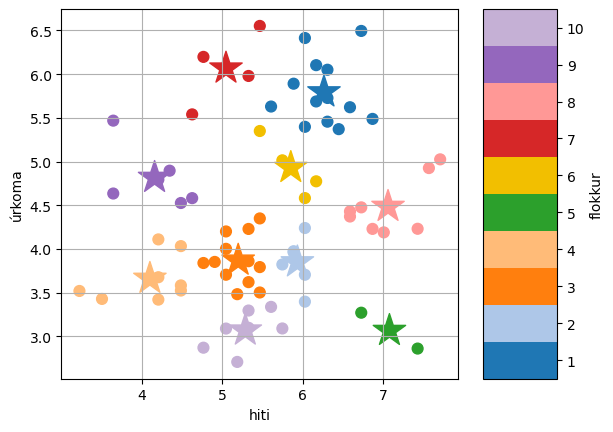

In [5]:
npr.seed(23)

(cb, d) = kmeans(X,10)
(x,y) = X.T

(mx,my) = cb.T
(code,dvec) = vq(X, cb)


lbl = [i for i in range(1,11)]
plt.scatter(x, y, s=60, c=code,  cmap=qcmap(10))
plt.scatter(mx, my, s=600, c=[0,1,2,3,4,5,6,7,8,9], marker='*', cmap=qcmap(10))
plt.xlabel('hiti'), plt.ylabel('úrkoma')

cb =plt.colorbar(ticks=range(10), label="flokkur", aspect=5)
plt.clim(-0.5,10-0.5)
cb.set_ticklabels(lbl)
plt.grid()


## VV6B 1

In [126]:
def næstum_eins(u,v):
    diff = np.linalg.norm(u-v)
    if diff < 1e-8:
        return True    
    return False

u = np.array([11.0, 24.0])
v = np.array([11.0000000000005, 24.000000000000095])
print(næstum_eins(u,v))

u = np.array([11, 24])
v = np.array([10, 24])
print(næstum_eins(u,v))

True
False


## VV6B 2

In [127]:
def í_plani(u,a,b):
  x = (a @ u) * a + (b @ u) * b
  return(næstum_eins(u,x))

## VV6B 3

In [131]:
a = np.array([0.48, 0.64, 0.60])
b = np.array([0.8, -0.6, 0])
A = np.array([4, 2, 3])
B = np.array([6, 3, 2])

print(í_plani(A, a, b))
print(í_plani(B, a, b))

True
False
